<a href="https://colab.research.google.com/github/iceaiai/CS-Kid-teaching/blob/main/AIES_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This notebook is created for co-working on the final project for AIES (2024 summer)
#Download link: https://www.kaggle.com/datasets/sidharth178/credit-data

In [25]:
import pandas as pd
Dataset_name = 'credit_data.csv'
df = pd.read_csv(Dataset_name)
#Drop all the row with null. Need to add a note in report
df_clean = df.fillna(0)
#print(df_clean)
#number of observation
print(f'Numbers of observations after data cleaning is {df_clean.shape[0]}')


Numbers of observations after data cleaning is 50636


In [130]:
#check the income status
print(df_clean['annual_income'].describe())
print(df_clean['annual_income'].value_counts(bins=10, sort=False))

# Examine the distribution of 'no_card'
print(df_clean['no_card'].describe())
print(df_clean['no_card'].value_counts())

count     50636.000000
mean     277243.989889
std      153838.973755
min       50000.000000
25%      154052.250000
50%      258860.500000
75%      385071.500000
max      999844.000000
Name: annual_income, dtype: float64
annual_income
(49050.155000000006, 144984.4]    11585
(144984.4, 239968.8]              11419
(239968.8, 334953.2]              10410
(334953.2, 429937.6]               8614
(429937.6, 524922.0]               6594
(524922.0, 619906.4]                762
(619906.4, 714890.8]                650
(714890.8, 809875.2]                185
(809875.2, 904859.6]                181
(904859.6, 999844.0]                236
Name: count, dtype: int64
count    50636.000000
mean         0.509815
std          0.669883
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: no_card, dtype: float64
no_card
0    29855
1    15747
2     5034
Name: count, dtype: int64


In [158]:
#Define two other dependent variables
#From description, the applicants are very rich or the currency might not be US dollars.
# 1. Eligible for Premium Card i.e. Black card for Amex
df_clean['eligible_for_premium'] = (df_clean['annual_income'] > 400000) & (df_clean['default'] == 0) #400000 is about top 20%

# 2. High-Risk Applicant, can discuss and modify the threshold
df_clean['high_risk'] = (df_clean['annual_income'] < 130000) & (df_clean['no_card'] >1) # 130000 is about the lower 20%

Gender vs. Eligible for Premium Card

In [159]:
#Usage of pd.crosstab: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
freq_gender_premium = pd.crosstab(df_clean['gender'], df_clean['eligible_for_premium'])
freq_gender_premium

eligible_for_premium,False,True
gender,,
Female,11574,2875
Male,29557,6630


Gender vs. High-Risk Applicant

In [160]:
freq_gender_risk = pd.crosstab(df_clean['gender'], df_clean['high_risk'])
freq_gender_risk

high_risk,False,True
gender,,
Female,14148,301
Male,35484,703


Gender vs. Default

In [162]:
freq_gender_default = pd.crosstab(df_clean['gender'], df_clean['default'])

Age vs. Eligible for Premium Card

In [163]:
#Check the age distribution to determine the bin
# pd.cut segment data: https://pandas.pydata.org/docs/reference/api/pandas.cut.html
bins = [0] + [i for i in range(20, 65, 1)]
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)

# Check the distribution of age groups
age_group_distribution = df_clean['age_group'].value_counts().sort_index()

# Display the distribution
print(age_group_distribution)

age_group
0-19     2653
20-20    1336
21-21    1325
22-22    1360
23-23    1383
24-24    1349
25-25    5502
26-26    5423
27-27    5512
28-28    5514
29-29    5491
30-30    2073
31-31     690
32-32     745
33-33     761
34-34     780
35-35     750
36-36     758
37-37     757
38-38     745
39-39     764
40-40     178
41-41     210
42-42     204
43-43     220
44-44     202
45-45     217
46-46     189
47-47     174
48-48     188
49-49     197
50-50     207
51-51     216
52-52     199
53-53     229
54-54     209
55-55     206
56-56     194
57-57     184
58-58     196
59-59     199
60-60     171
61-61     188
62-62     202
63-63     181
Name: count, dtype: int64


In [164]:
bins = [18,27,40,100]
labels = ['18-27','28-40','41+']

df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)
freq_age_premium = pd.crosstab(df_clean['age_group'], df_clean['eligible_for_premium'])
freq_age_premium

eligible_for_premium,False,True
age_group,,
18-27,16910,3421
28-40,20381,4959
41+,3840,1125


Age vs. High-Risk Applicant

In [165]:
freq_age_risk = pd.crosstab(df_clean['age_group'], df_clean['high_risk'])
freq_age_risk

high_risk,False,True
age_group,,
18-27,19925,406
28-40,24833,507
41+,4874,91


Age vs. Default

In [167]:
freq_age_default = pd.crosstab(df_clean['age_group'], df_clean['default'])
freq_age_default

default,0,1
age_group,,
18-27,15307,5024
28-40,22569,2771
41+,4738,227


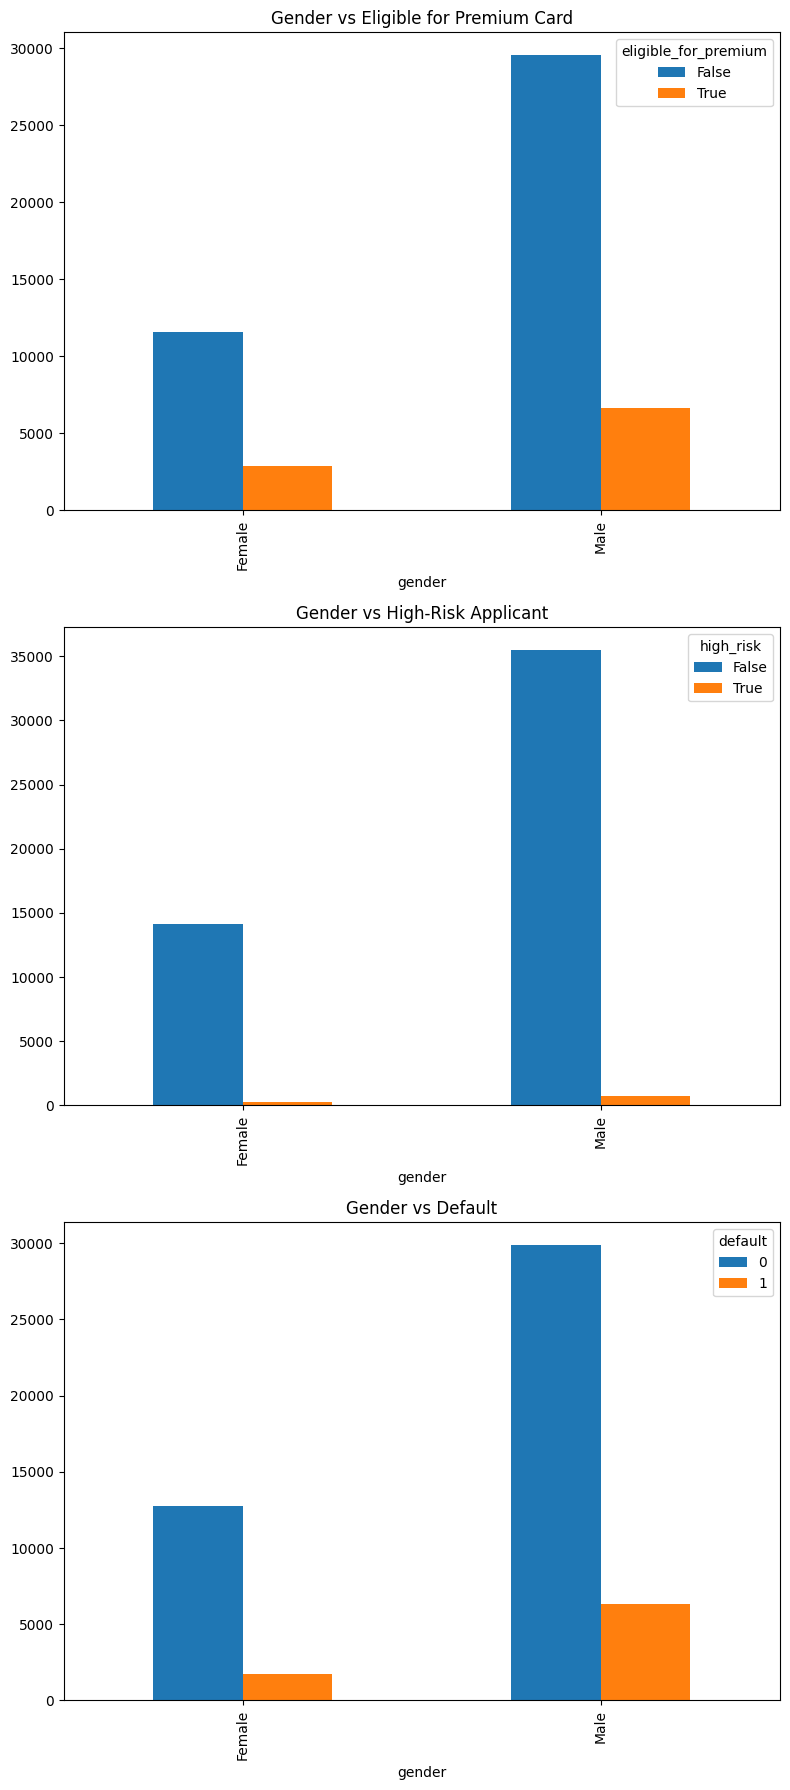

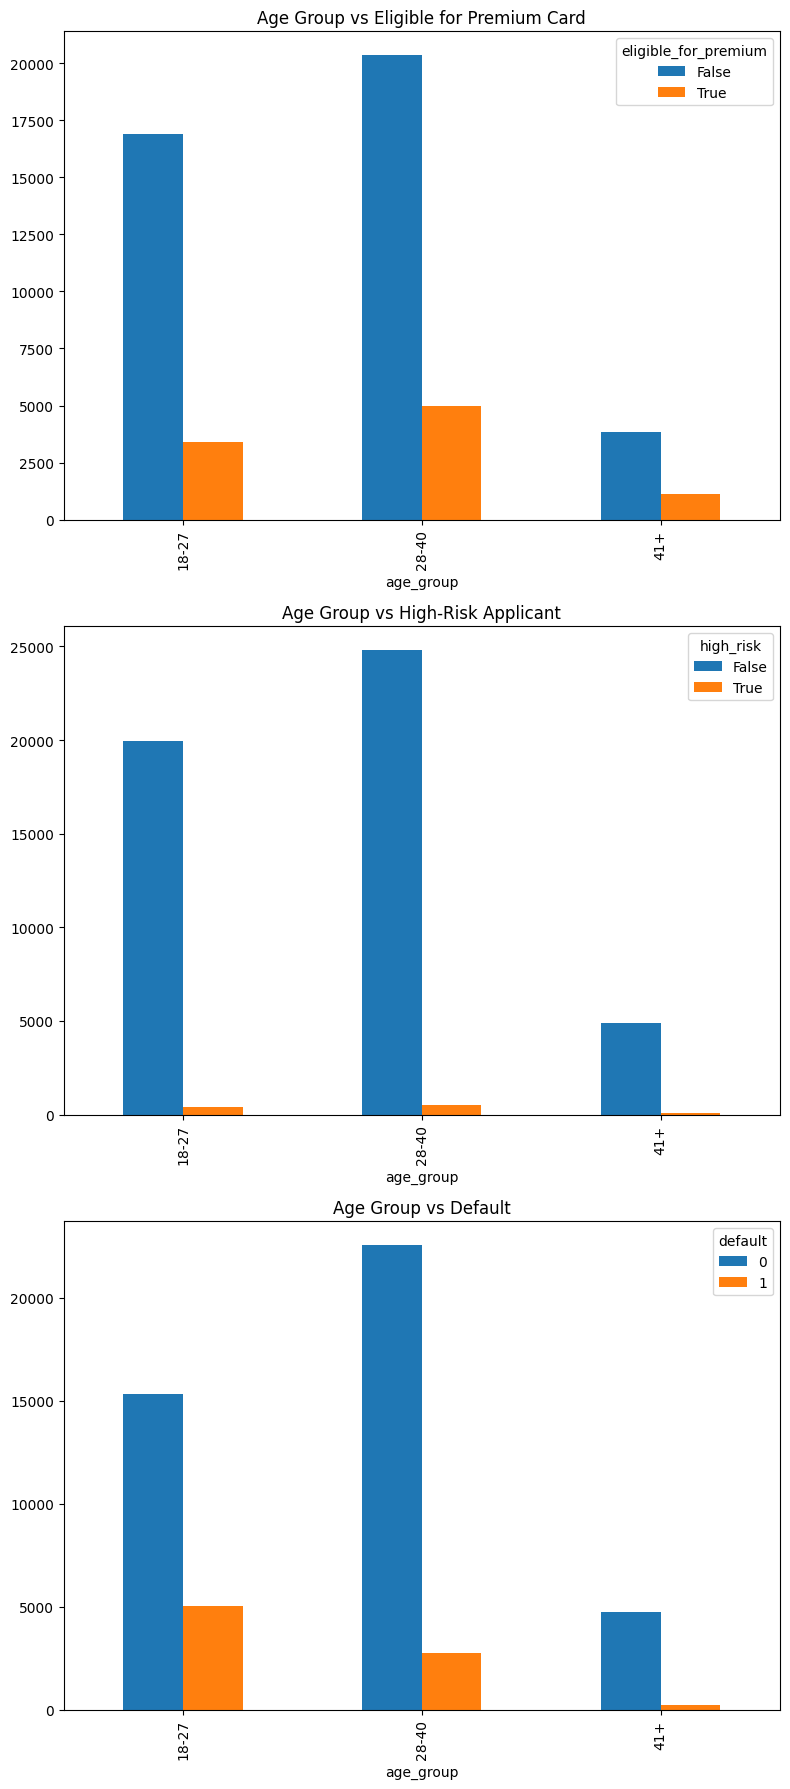

In [168]:
import matplotlib.pyplot as plt

# Create bar charts for Gender
fig, ax = plt.subplots(3, 1, figsize=(8, 18))

freq_gender_premium.plot(kind='bar', ax=ax[0], title='Gender vs Eligible for Premium Card')
freq_gender_risk.plot(kind='bar', ax=ax[1], title='Gender vs High-Risk Applicant')
freq_gender_default.plot(kind='bar', ax=ax[2], title='Gender vs Default')

plt.tight_layout()
plt.show()

# Create bar charts for Age Group
fig, ax = plt.subplots(3, 1, figsize=(8, 18))

freq_age_premium.plot(kind='bar', ax=ax[0], title='Age Group vs Eligible for Premium Card')
freq_age_risk.plot(kind='bar', ax=ax[1], title='Age Group vs High-Risk Applicant')
freq_age_default.plot(kind='bar', ax=ax[2], title='Age Group vs Default')

plt.tight_layout()
plt.show()

Step 3
1. Statistical Parity Difference
2. Equal Opportunity Difference
3. Average Odds Difference
4. Disparate Impact
5. Theil Index

In [ ]:
import numpy as np



def statistical_parity_difference(df, protected_col='protected', predicted_col='predicted'):
    p_protected = df[df[protected_col] == 1][predicted_col].mean()
    p_unprotected = df[df[protected_col] == 0][predicted_col].mean()
    return p_protected - p_unprotected

def true_positive_rate(df, protected_col='protected', predicted_col='predicted', actual_col='actual'):
    df_pos = df[df[actual_col] == 1]
    tpr_protected = (df_pos[df_pos[protected_col] == 1][predicted_col] == 1).mean()
    tpr_unprotected = (df_pos[df_pos[protected_col] == 0][predicted_col] == 1).mean()
    return tpr_protected, tpr_unprotected

def equal_opportunity_difference(df, protected_col='protected', predicted_col='predicted', actual_col='actual'):
    tpr_protected, tpr_unprotected = true_positive_rate(df, protected_col, predicted_col, actual_col)
    return tpr_protected - tpr_unprotected

def false_positive_rate(df, protected_col='protected', predicted_col='predicted', actual_col='actual'):
    df_neg = df[df[actual_col] == 0]
    fpr_protected = (df_neg[df_neg[protected_col] == 1][predicted_col] == 1).mean()
    fpr_unprotected = (df_neg[df_neg[protected_col] == 0][predicted_col] == 1).mean()
    return fpr_protected, fpr_unprotected

def average_odds_difference(df, protected_col='protected', predicted_col='predicted', actual_col='actual'):
    tpr_protected, tpr_unprotected = true_positive_rate(df, protected_col, predicted_col, actual_col)
    fpr_protected, fpr_unprotected = false_positive_rate(df, protected_col, predicted_col, actual_col)
    return 0.5 * ((tpr_protected - tpr_unprotected) + (fpr_protected - fpr_unprotected))

def disparate_impact(df, protected_col='protected', predicted_col='predicted'):
    p_protected = df[df[protected_col] == 1][predicted_col].mean()
    p_unprotected = df[df[protected_col] == 0][predicted_col].mean()
    return p_protected / p_unprotected

def theil_index(df, predicted_col='predicted'):
    y_pred = df[predicted_col]
    y_mean = y_pred.mean()
    theil = (y_pred / y_mean * np.log(y_pred / y_mean)).mean()
    return theil

# Example usage with a DataFrame df
# df = pd.DataFrame({'protected': [0, 1, 0, 1, ...], 'predicted': [0, 1, 1, 0, ...], 'actual': [0, 1, 0, 1, ...]})
# print("Statistical Parity Difference:", statistical_parity_difference(df))
# print("Equal Opportunity Difference:", equal_opportunity_difference(df))
# print("Average Odds Difference:", average_odds_difference(df))
# print("Disparate Impact:", disparate_impact(df))
# print("Theil Index:", theil_index(df))
